In [1]:
# 서포트 벡터 머신 (svm) 을 이용한 분류
# 라이브러리 호출
from sklearn import svm
from sklearn import metrics
from sklearn import datasets        # 데이터 셋, iris가 존재함
from sklearn import model_selection # 데이터 분류
import tensorflow as T_FMT          # 텐서플로
import os                           # os 작업 관련된 함수들이 존재함
os.environ['TF_CPP_MIN_LOG_LEVEL'] =  '3' # 0-모든로그, 1-info필터링, 2-Warning, 3-error 필터링


In [6]:
iris = datasets.load_iris()     # iris 데이터 로드
iris
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    iris.data, 
    iris.target, 
    test_size=0.6,
    random_state=42)


In [11]:
len(x_train)
len(x_test)
len(y_train)

60

In [12]:
# 사이킷런 사용하여 SVM 모델 생성및 훈련 진행..
svm= svm.SVC(kernel='linear', C=1.0, gamma=0.5) #SVM 모델
svm.fit(x_train, y_train)

SVC(gamma=0.5, kernel='linear')

In [13]:
# 예측 평가
predictions = svm.predict(x_test)
# 정화도 : 예측결과와 실제 결과를 비교
score = metrics.accuracy_score(y_test, predictions)
print(f"정확도 : {score}")

정확도 : 0.9888888888888889


In [33]:
# 의사 결정 트리
import pandas as pd
# read_csv() 의 옵션 index_col은 해당 컬럼을인덱스 값으로 사용하겠다.
df = pd.read_csv('./data/titanic/train.csv', index_col='PassengerId')
print(df.head())
df.info()

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [34]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # 성별을 정수로 0과 1로 변경
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,1
4,1,1,35.0,1,0,53.1000,1
5,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0
888,1,1,19.0,0,0,30.0000,1
889,3,1,NaN,1,2,23.4500,0


In [35]:
df = df.dropna() ## 결측치값 데이터 삭제

In [36]:
# 훈련데이터 처리.. 훈련값, 정답(labels)
x = df.drop('Survived', axis=1) # 생존여부를 제외한 데이터, x_train
y = df['Survived'] # Survived 값을 예측 레이블로 사용     , y_train

In [ ]:
#훈련과 테스트 데이터셋으로 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [ ]:
# 결정 트리 모델 생성
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [42]:
# 모델 훈련
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
# 모델 예측
y_predict = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) # 테스트 데이터에 대한 예측 결과를 보여줌

0.8212290502793296

In [45]:
# 혼동행렬을 통한 값 보기
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,97,15
True Survival,17,50


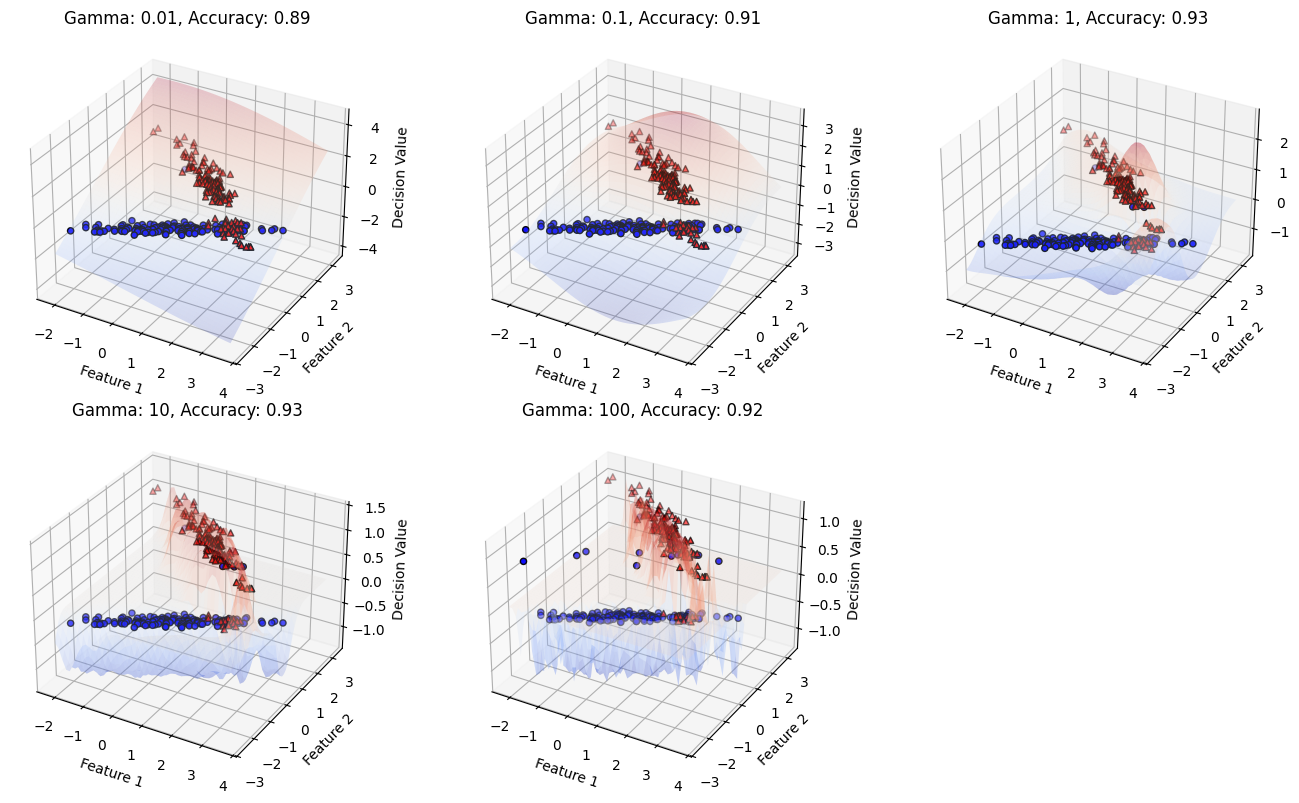

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 생성
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# 학습과 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 감마 값 목록 설정
gammas = [0.01, 0.1, 1, 10, 100]

# 3D 그래프 설정
fig = plt.figure(figsize=(14, 8))
colors = ['r', 'g', 'b', 'y', 'm']

for idx, gamma in enumerate(gammas):
    clf = SVC(kernel='rbf', gamma=gamma, C=1.0)
    clf.fit(X_train, y_train)
    
    # 예측 및 정확도 계산
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    X0, X1 = X_test[:, 0], X_test[:, 1]
    xx, yy = np.meshgrid(np.linspace(X0.min(), X0.max(), 50), np.linspace(X1.min(), X1.max(), 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax = fig.add_subplot(2, 3, idx + 1, projection='3d')
    ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.2)
    ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], y_pred[y_test==0], c='blue', marker='o', edgecolor='k')
    ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], y_pred[y_test==1], c='red', marker='^', edgecolor='k')
    ax.set_title(f'Gamma: {gamma}, Accuracy: {accuracy:.2f}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Decision Value')

plt.tight_layout()
plt.show()


In [52]:
# 로지스틱 회귀

%matplotlib inline
from sklearn.datasets import load_digits # 숫자 이미지
digits = load_digits()
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


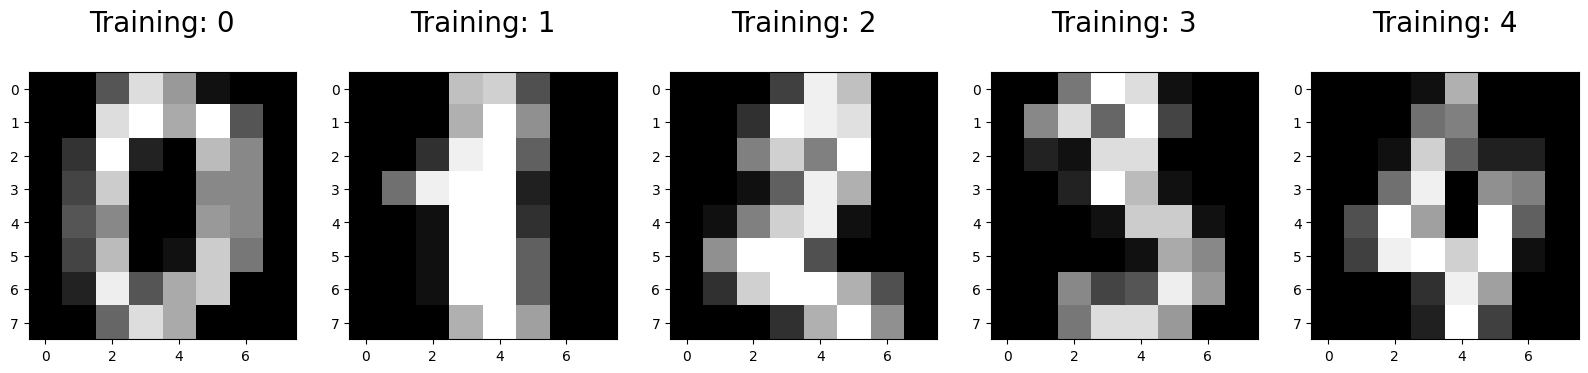

In [54]:
# digits 데이터 이미지 보기
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

In [55]:
# 훈련 데이터 및 Lable 생성
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    test_size=0.25, random_state=0)

In [56]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train) 

d:\tensorflow\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
# 부분 테스트 진행
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [61]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


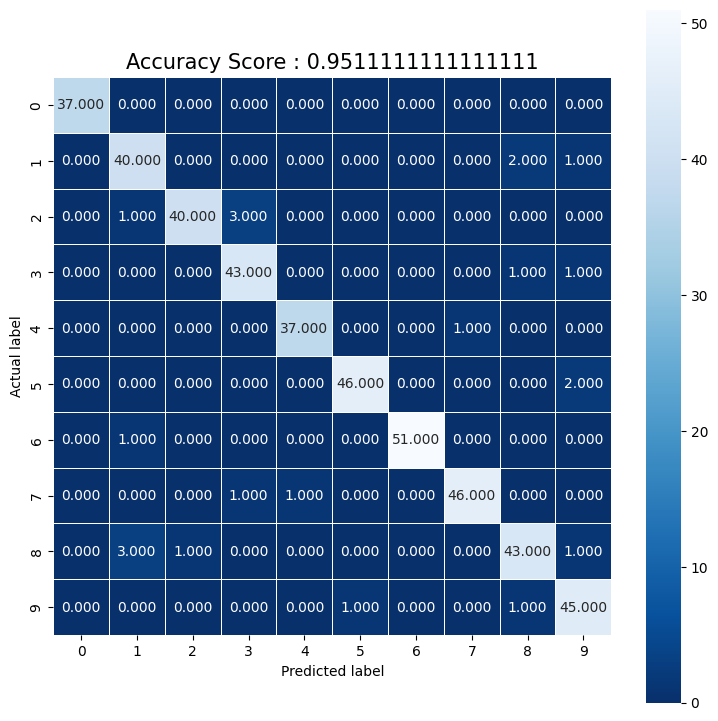

In [66]:
# 혼동행렬을 표시하기(seaborn 을 이용한 hitmap)
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score : {score}'
plt.title(all_sample_title, size=15)

plt.show()

In [67]:
# 선형 회귀
# 사용할 라이브러리
# 데이터 처리를 위한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 머신러닝을 위한 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [68]:
# 데이타 불러오기
dataset = pd.read_csv('./data/weather.csv')

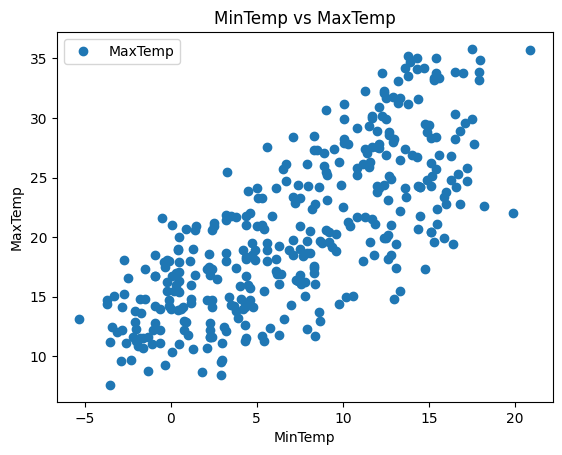

In [69]:
#데이터 간 관계를 시각화로 표현
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [73]:
#데이터를 독립 변수와 종속 변수로 분리하고 선형 회귀 모델 생성
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 데이터의 80%를 훈련 데이터셋으로 하고 데이터의 20%를 검증 데이터셋으로 분할

regressor = LinearRegression() # 선형 회귀 클래스를 가져옴
regressor.fit(X_train, y_train) # fit( ) 메서드를 사용하여 모델 훈련

LinearRegression()

In [74]:
#회귀 모델에 대한 예측
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


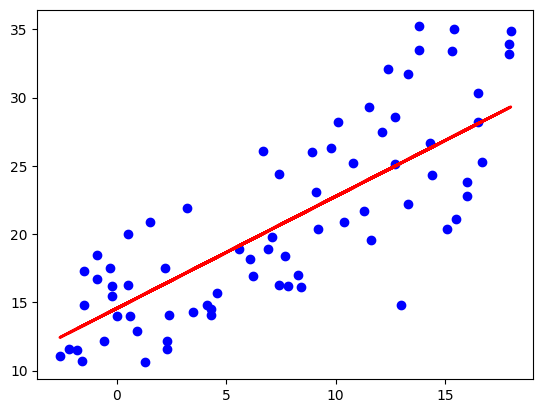

In [76]:
# 테스스 데이터셋을 사용한 회귀선 표현
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [79]:
# 선형 회귀 모델 평가(평균 제곱법)
print('평균 제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균 제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균 제곱법: 17.011877668640622
루트 평균 제곱법: 4.124545753006096
